In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
comic_con = pd.read_csv('coordinate.csv', index_col=0)
comic_con.head()

,y_coordinate,x_scaled,y_scaled
x_coordinate,,,
24,4,654.321,9.001
11,6,651.984,135.015
35,0,456.354,0.000
13,0,258.411,0.000
26,4,620.312,9.001


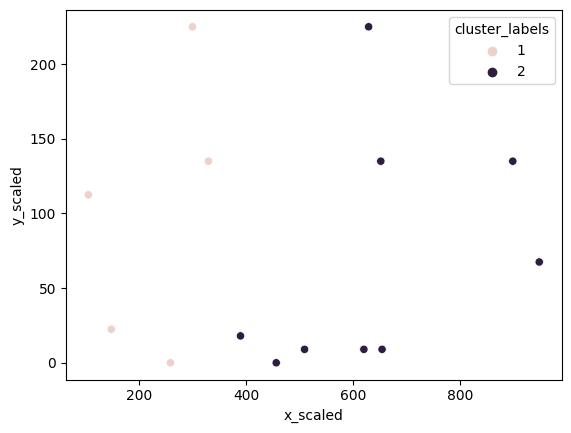

In [12]:
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

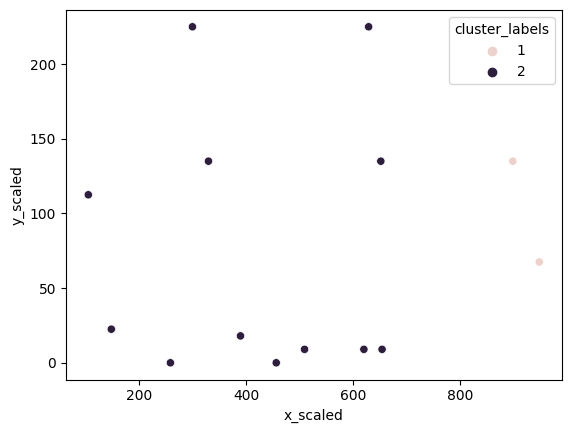

In [13]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

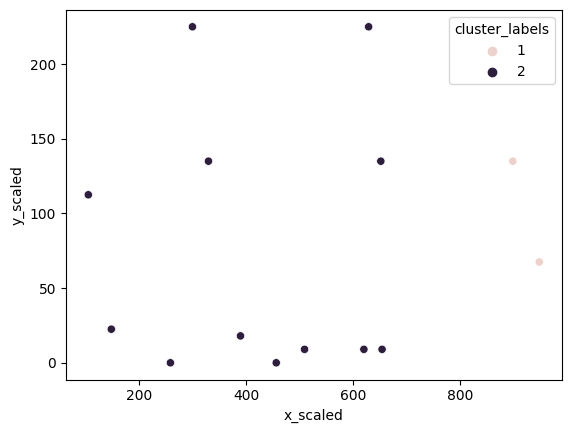

In [14]:
# Use the linkage()
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

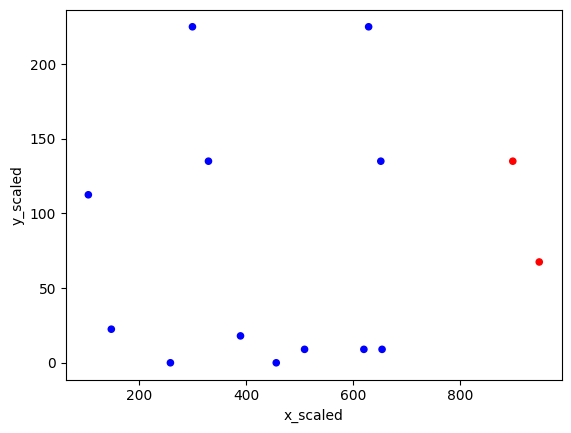

In [15]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot the scatter plot
comic_con.plot.scatter(x='x_scaled', y='y_scaled', c=comic_con['cluster_labels'].apply(lambda x: colors[x]));

<Axes: xlabel='x_scaled', ylabel='y_scaled'>

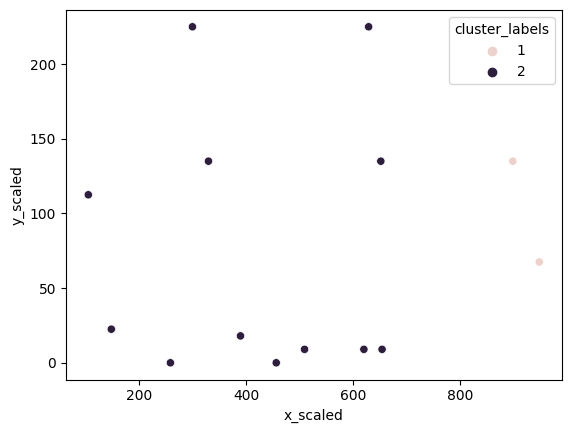

In [16]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)

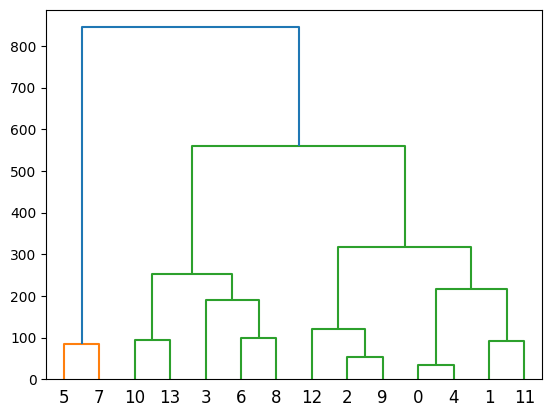

In [17]:
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

In [18]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

467 µs ± 47.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
